In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [81]:
profit = pd.read_csv("50_Startups.csv")
profit

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [82]:
profit.drop(["State"],inplace=True,axis=1)

In [83]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Research_Spend   50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [84]:
profit.isnull().sum()

Research_Spend     0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [85]:
profit.corr()

,Research_Spend,Administration,Marketing_Spend,Profit
Research_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


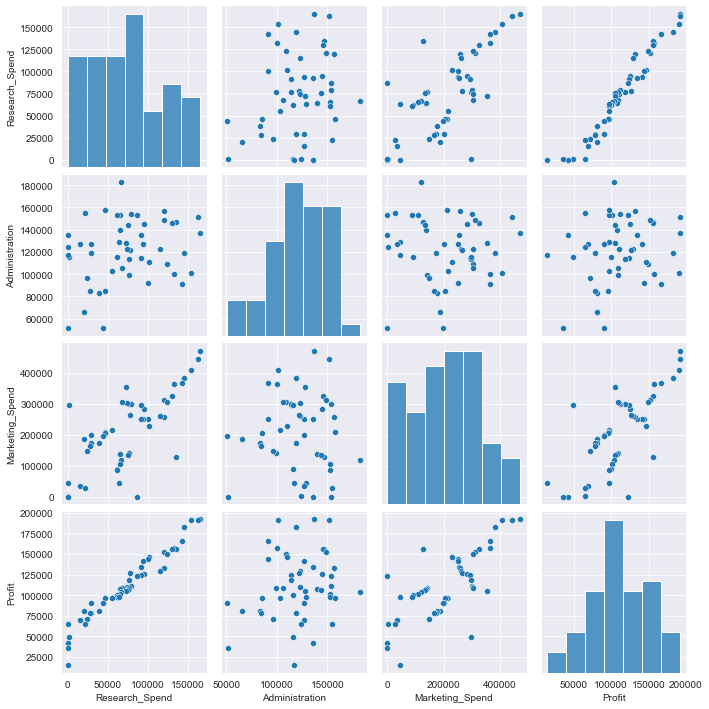

In [86]:
sns.set_style(style='darkgrid')
sns.pairplot(profit)

In [87]:
model = smf.ols('Profit~Administration+Marketing_Spend+Research_Spend',data=profit).fit()

In [88]:
model.params

Intercept          50122.192990
Administration        -0.026816
Marketing_Spend        0.027228
Research_Spend         0.805715
dtype: float64

In [89]:
print(model.tvalues , '/n', model.pvalues)

Intercept           7.626218
Administration     -0.525507
Marketing_Spend     1.655077
Research_Spend     17.846374
dtype: float64 /n Intercept          1.057379e-09
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
Research_Spend     2.634968e-22
dtype: float64


In [90]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        13:38:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Research_Spend      0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
ml_a=smf.ols('Profit~Administration',data = profit).fit() 
print(ml_a.tvalues, '\n', ml_a.pvalues)  
ml_a.summary()

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 15 Jan 2021   Prob (F-statistic):              0.162
Time:                        13:38:31   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
ml_m=smf.ols('Profit~Marketing_Spend',data = profit).fit() 
print(ml_m.tvalues, '\n', ml_m.pvalues)  
ml_m.summary()

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        13:38:59   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
ml_pm=smf.ols('Profit~Administration+Marketing_Spend',data = profit).fit() 
print(ml_pm.tvalues, '\n', ml_pm.pvalues)  
ml_pm.summary()

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        13:41:12   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
rsq_a = smf.ols('Administration~Marketing_Spend+Research_Spend',data=profit).fit().rsquared  
vif_a = 1/(1-rsq_a)

In [100]:
rsq_m = smf.ols('Marketing_Spend~Administration+Research_Spend',data=profit).fit().rsquared  
vif_m = 1/(1-rsq_m)

In [101]:
rsq_r = smf.ols('Research_Spend~Administration+Marketing_Spend',data=profit).fit().rsquared  
vif_r = 1/(1-rsq_r)

In [102]:
d1 = {'Varialbes': ['Administration','Marketing_Spend','Research_Spend'],'VIF':[vif_a,vif_m,vif_r]}
Vif_data = pd.DataFrame(d1)
Vif_data

,Varialbes,VIF
0,Administration,1.175091
1,Marketing_Spend,2.326773
2,Research_Spend,2.468903


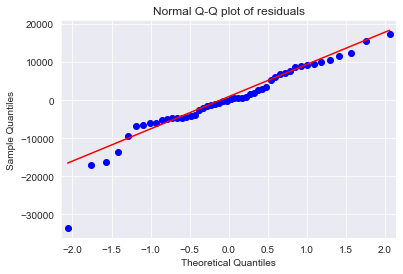

In [103]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [104]:
list(np.where(model.resid>10000)) 

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

In [105]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

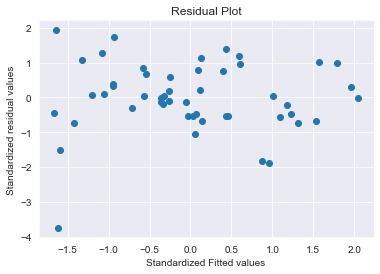

In [106]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

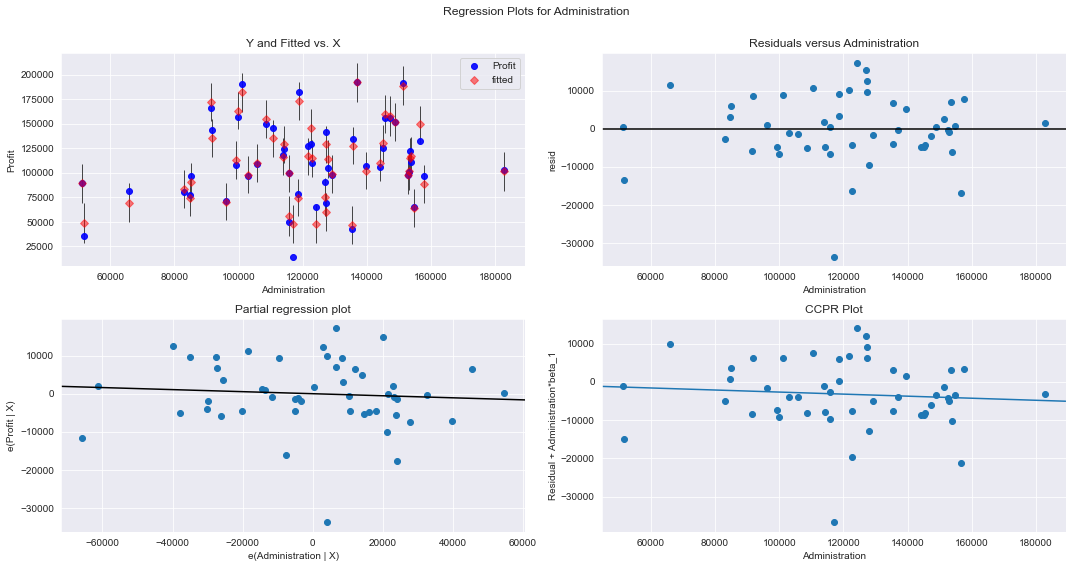

In [107]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

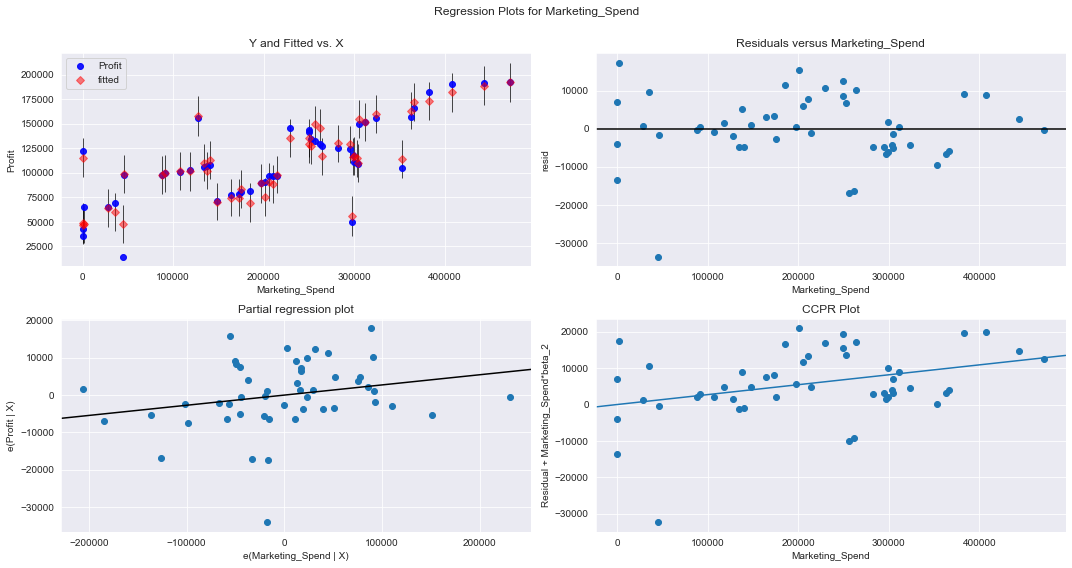

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

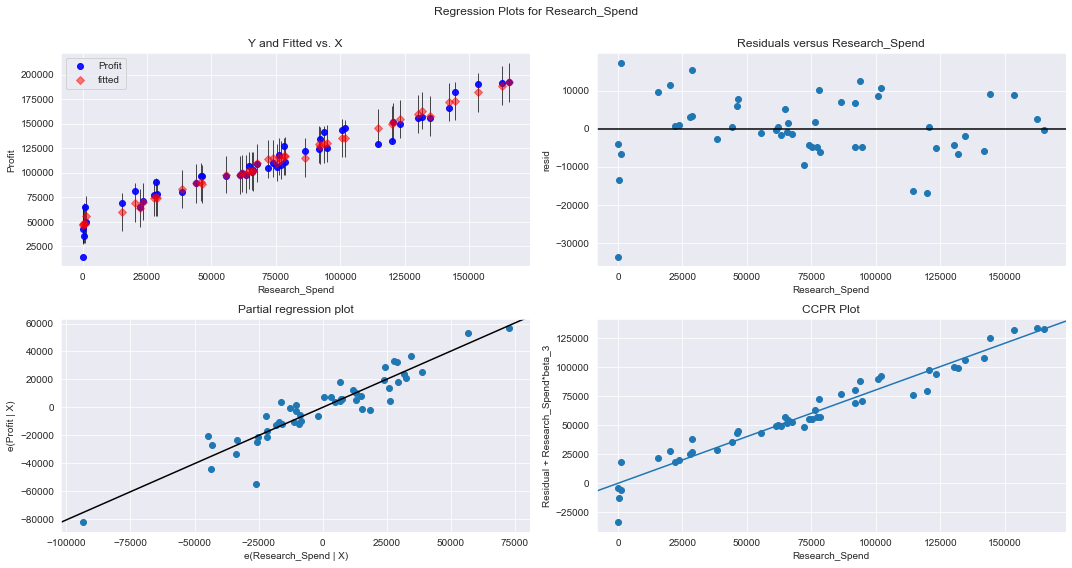

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Research_Spend", fig=fig)
plt.show()

In [110]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

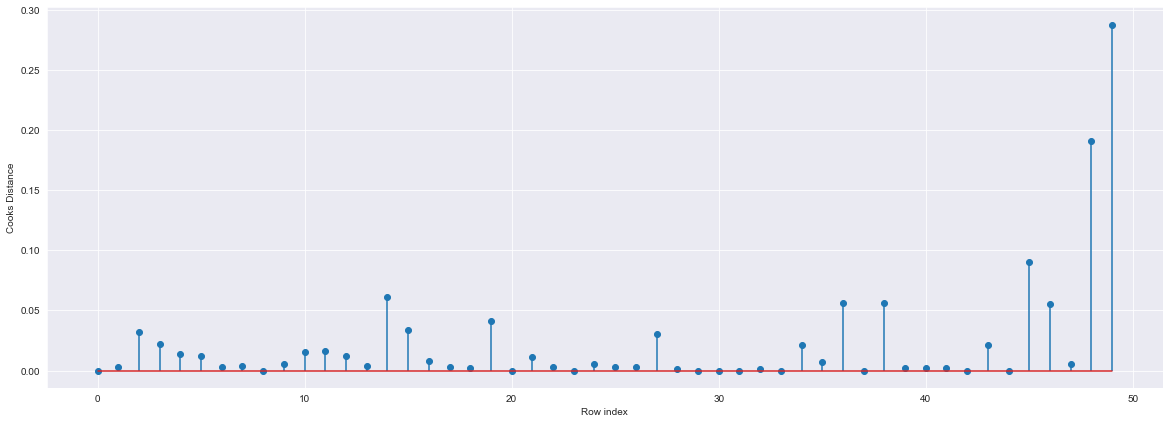

In [111]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(profit)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [112]:
(np.argmax(c),np.max(c))

(49, 0.288082292754327)

In [115]:
final_ml_P= smf.ols('Profit~Administration+Research_Spend',data = profit).fit()

In [116]:
(final_ml_P.rsquared,final_ml_P.aic)

(0.9478129385009173, 1059.6636934567293)

In [119]:
profit

,Research_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [120]:
new_data=pd.DataFrame({'Research_Spend':17000,"Administration":14000,"Marketing_Spend":48000},index=[1])
new_data

,Research_Spend,Administration,Marketing_Spend
1,17000,14000,48000


In [121]:
final_ml_P.predict(new_data)

1    68800.690202
dtype: float64

In [122]:
final_ml_P.predict(profit.iloc[0:5,])

0    190182.180514
1    187042.700174
2    181811.052822
3    173063.604832
4    172556.566886
dtype: float64

In [123]:
pred_y = final_ml_P.predict(profit)

In [124]:
pred_y

0     190182.180514
1     187042.700174
2     181811.052822
3     173063.604832
4     172556.566886
5     163290.343299
6     163140.161084
7     159506.552582
8     150927.069214
9     155456.338405
10    136886.736437
11    136813.244176
12    129060.848433
13    127014.294107
14    149995.546004
15    147121.351290
16    115699.010578
17    128803.810974
18    127934.425602
19    121255.051066
20    114591.997463
21    114318.302643
22    112171.736192
23    107503.307314
24    116046.189233
25    103239.549657
26    112190.445185
27    110275.641867
28    102151.443140
29    103336.284260
30    102204.716777
31     99500.888718
32    102704.489740
33     97267.376385
34     86554.312813
35     90049.008683
36     72864.764709
37     90162.344647
38     68831.974816
39     83730.933594
40     73393.846339
41     74444.324569
42     70170.280405
43     61503.709214
44     65802.430738
45     49169.392917
46     49882.972274
47     47709.612512
48     52611.781096
49     48687.013622


In [117]:
d2 = {'Variable':['Model 1','Final Model'],'Rsquare Value':[model.rsquared,final_ml_P.rsquared]}
Model_Rsquare = pd.DataFrame(d2)
Model_Rsquare

,Variable,Rsquare Value
0,Model 1,0.950746
1,Final Model,0.947813
